# What makes an NBA All-Star
### Analyzing what statistics other NBA Players look at when the vote for All-Stars
By Nicolas Gold, Eric Wang, and Richard Lin

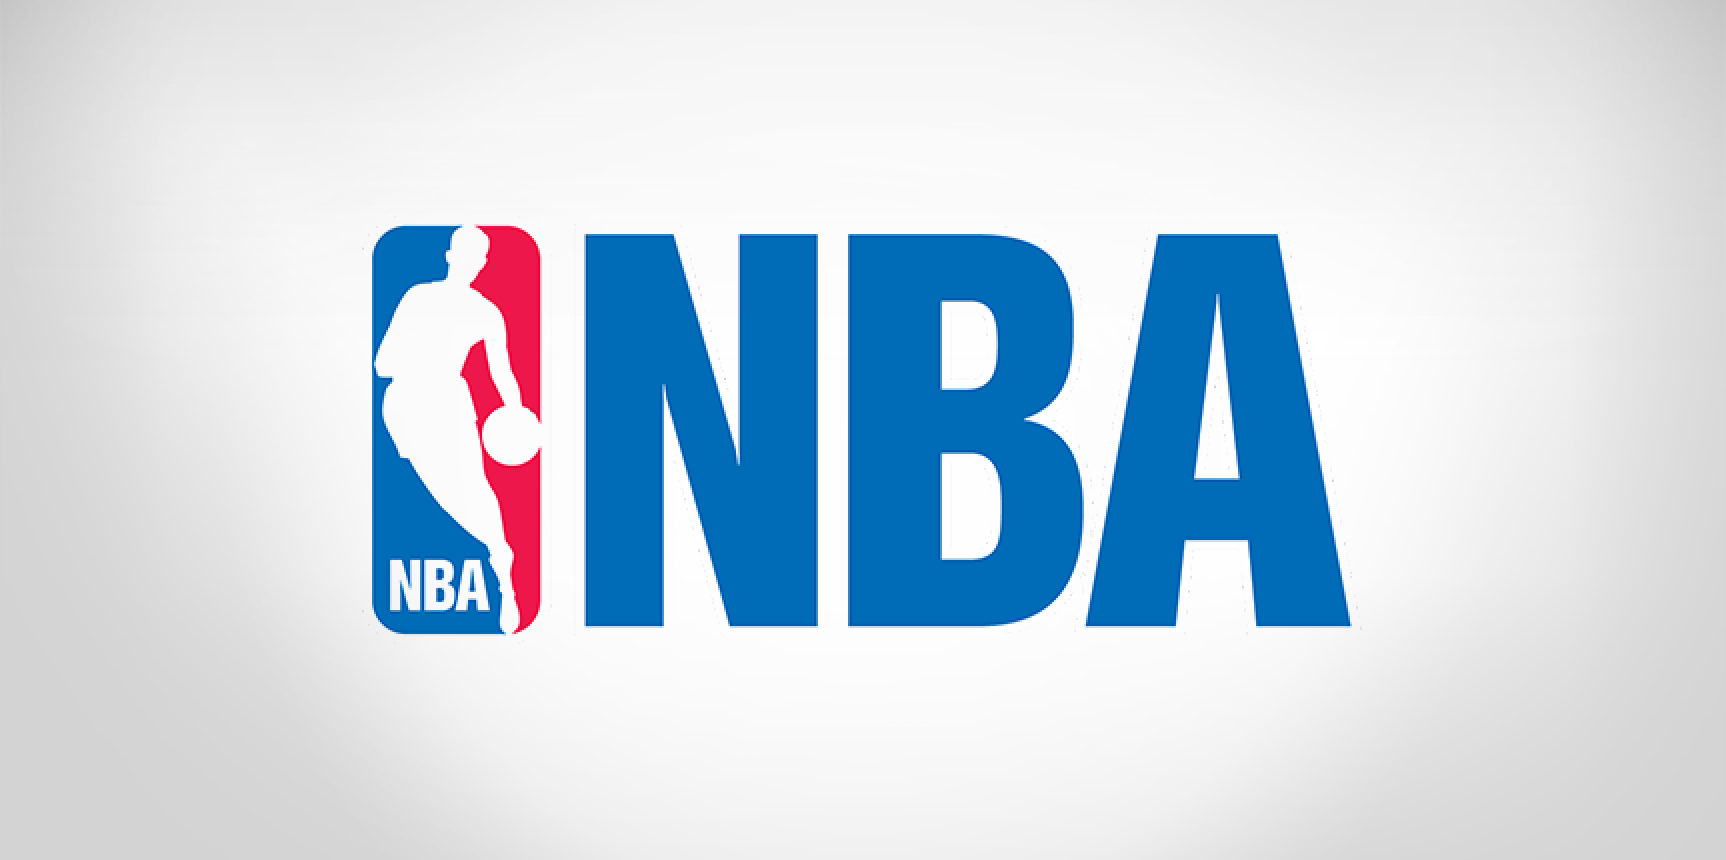

# Introduction
In the National Basketball Association (NBA), every season there is an All Star Game where the best players in the league play in a single game just for fun. The way these players are determined are by 3 sets of votes. The first set of votes come from the fans, the second set comes from the players in the league, and the third set of votes come from the NBA media. Whether you're a fan, a player, or a member of the media, you get a total of 5 votes (3 guards and 2 forwards). This project will focus on the player votes.

Using player statistics from last year's season, we will first see which how many votes each player got last season. Then we will use the player statistics and the votes they recieved to see which stats (such as points per game, or rebounds per game) other NBA players value the most in voting so we can get a better idea of what makes up an NBA All Star

# Table of Contents
### 1. Getting Started
 - 1.1 Libraries
 - 1.2 Extracting the Data
 - 1.3 Merging the Data
 - 1.4 Isolating Columns and Top 200 Players

# 1. Getting Started

## 1.1 Libraries

Someone describe each of the libraries when we are done with them all. These are NOT all the libraries

In [1]:
import requests
import numpy as np
import re
from bs4 import BeautifulSoup
import datetime as dt
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
from patsy import dmatrices
from sklearn import datasets
import html5lib
import pandas as pd

## 1.2 Extracting the Data

There are 3 different sets of data that we will be extracting for this project:
 - Data Set 1: Player's and their Statistics (main Data Set)
 - Data Set 2: NBA 2K Player Ratings
 - Data Set 3: Player All Star Votes

#### Data Set 1: Player's and their Statistics:
 - This Data Set contains all the NBA players from the 2018-2019 NBA Season
 - For each player, it contains basic attributes for the player such as Team, Height, Weight, Age, etc.
 - Along with the attrivutes, it contains the players averages for each game of the season, such as Point, Rebounds, Assists, Steals, Field Goal Percentage, etc.
 - Link to the Kaggle Data Set is here: https://www.kaggle.com/mcamli/nba17-18#nba_extra.csv. Important thing to note, the name of the file says "2017-2018" but it is really the 2018-2019 Season. The file is nba_extra.csv

In [2]:
NBA_Players = pd.read_csv("nbastats2018-2019.csv", sep=',')
NBA_Players = NBA_Players.dropna()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1) 
NBA_Players.head(10)

,Name,Height,Weight,Team,Age,Salary,Points,Blocks,Steals,Assists,Rebounds,FT%,FTA,FG3%,FG3A,FG%,FGA,MP,G,PER,OWS,DWS,WS,WS48,USG,BPM,VORP
0,Alex Abrines,78,200,Oklahoma City Thunder,25,5455236,5.3,0.2,0.5,0.6,1.5,0.923,0.4,0.323,4.1,0.357,5.1,19.0,31,6.3,0.1,0.6,0.6,0.053,12.2,-3.4,-0.2
1,Quincy Acy,79,240,Phoenix Suns,28,213949,1.7,0.4,0.1,0.8,2.5,0.700,1.0,0.133,1.5,0.222,1.8,12.3,10,2.9,-0.1,0.0,-0.1,-0.022,9.2,-5.9,-0.1
2,Jaylen Adams,74,190,Atlanta Hawks,22,236854,3.2,0.1,0.4,1.9,1.8,0.778,0.3,0.338,2.2,0.345,3.2,12.6,34,7.6,-0.1,0.2,0.1,0.011,13.5,-4.4,-0.3
3,Steven Adams,84,265,Oklahoma City Thunder,25,24157304,13.9,1.0,1.5,1.6,9.5,0.500,3.7,0.000,0.0,0.595,10.1,33.4,80,18.5,5.1,4.0,9.1,0.163,16.4,2.7,3.2
4,Bam Adebayo,82,255,Miami Heat,21,2955840,8.9,0.8,0.9,2.2,7.3,0.735,2.8,0.200,0.2,0.576,5.9,23.3,82,17.9,3.4,3.4,6.8,0.171,15.8,3.0,2.4
6,LaMarcus Aldridge,83,260,San Antonio Spurs,33,22347015,21.3,1.3,0.5,2.4,9.2,0.847,5.1,0.238,0.5,0.519,16.3,33.2,81,22.9,6.4,2.9,9.3,0.167,26.9,1.6,2.5
8,Grayson Allen,77,198,Utah Jazz,23,2074320,5.6,0.2,0.2,0.7,0.6,0.750,1.6,0.323,2.6,0.376,4.7,10.9,38,7.5,-0.4,0.4,0.0,0.002,24.4,-6.8,-0.5
9,Jarrett Allen,83,237,Brooklyn Nets,20,2034120,10.9,1.5,0.5,1.4,8.4,0.709,3.5,0.133,0.6,0.590,7.1,26.2,80,18.5,4.4,3.3,7.6,0.175,15.9,2.5,2.4
11,Al-Farouq Aminu,81,220,Portland Trail Blazers,28,6957105,9.4,0.4,0.8,1.3,7.5,0.867,2.1,0.343,3.5,0.433,7.3,28.3,81,13.2,3.0,2.8,5.8,0.121,13.7,0.9,1.7
12,Justin Anderson,78,230,Atlanta Hawks,25,2516048,3.7,0.3,0.5,0.5,1.8,0.743,0.7,0.312,1.6,0.408,3.3,9.6,48,11.2,0.1,0.4,0.4,0.043,17.2,-3.3,-0.1


#### Data Set 2: NBA 2K Player Ratings:
 - These are Player ratings taken from the NBA based video game NBA 2K19
 - These ratings are from 0 (being the worst) to 99 (being the best)
 - The ratings are based by predetermined attributes that are not depicted in the data set
 - The purpose of these ratings is to give a quantitive value to how good a player is, so we can order the players from best to worst if need be.
 - Link to the Kaggle Data Set is here: https://www.kaggle.com/stormex/nba-2019-ratings

In [3]:
Ratings = pd.read_csv("Nba 19 ratings.csv", sep=',')
Ratings = Ratings.loc[:, ~Ratings.columns.str.contains('^Unnamed')]
Ratings.columns = ['Name', 'Rating']
Ratings.head(10)

,Name,Rating
0,Kent Bazemore,76
1,Dewayne Dedmon,77
2,John Collins,84
3,Miles Plumlee,71
4,DeAndre’ Bembry,72
5,Taurean Prince,77
6,Trae Young,84
7,Kevin Huerter,74
8,Omari Spellman,73
9,Justin Anderson,72


#### Data Set 3: Player All Star Votes
 - This data is scraped off of the website https://www.basketball-reference.com/allstar/NBA_2019_voting-backcourt-eastern-conference.html. 
 - On the website there are four tabs. Two for each conference and in each conference it is split between forwards and guards
 - Each data set contains votes from fans, players, and media. We will be using the player votes.
 - In this data set, we will also get which conference (East or West) and which position each player is.

In [4]:
urls = [["https://www.basketball-reference.com/allstar/NBA_2019_voting-frontcourt-eastern-conference.html","East","Forward"],
       ["https://www.basketball-reference.com/allstar/NBA_2019_voting-frontcourt-western-conference.html","West","Forward"],
       ["https://www.basketball-reference.com/allstar/NBA_2019_voting-backcourt-eastern-conference.html","East","Guard"],
       ["https://www.basketball-reference.com/allstar/NBA_2019_voting-backcourt-western-conference.html","West","Guard"]]

players = []
votes = []
position = []
conference = []
for val in urls:
    url = val[0]
    conf = val[1]
    pos = val[2]
    r = requests.get(url).text
    soup = BeautifulSoup(r ,'lxml')
    table = soup.find('table')
    list_of_rows = []
    for row in table.findAll('tr'):
        list_of_cells = []
        for cell in row.findAll(["th","td"]):
            text = cell.text
            list_of_cells.append(text)
        list_of_rows.append(list_of_cells)
    list_of_rows.pop(0)
    list_of_rows.pop(0)
    
    for player in list_of_rows:
        players.append(player[1])
        votes.append(player[5])
        conference.append(conf)
        position.append(pos)

Player_Votes = pd.DataFrame()
Player_Votes['Name'] = players
Player_Votes['Votes'] = votes
Player_Votes['Position'] = position
Player_Votes['Conference'] = conference
Player_Votes.head(10)

,Name,Votes,Position,Conference
0,Giannis Antetokounmpo,269,Forward,East
1,Kawhi Leonard,189,Forward,East
2,Joel Embiid,186,Forward,East
3,Jayson Tatum,19,Forward,East
4,Pascal Siakam,16,Forward,East
5,Nikola Vučević,17,Forward,East
6,Jimmy Butler,51,Forward,East
7,Blake Griffin,50,Forward,East
8,Vince Carter,11,Forward,East
9,Andre Drummond,21,Forward,East


## 1.3 Merging the Data

Now that we have the three data sets, we can merge them all together on the column 'Name'.
We will also sort the values by votes.

In [9]:
Complete_Data = pd.merge(NBA_Players, pd.merge(Ratings, Player_Votes, on='Name'), on='Name')
Complete_Data.Votes = Complete_Data.Votes.astype(float)
Complete_Data = Complete_Data.sort_values(by = ['Votes'], ascending = False)
Complete_Data.head(10)

,Name,Height,Weight,Team,Age,Salary,Points,Blocks,Steals,Assists,Rebounds,FT%,FTA,FG3%,FG3A,FG%,FGA,MP,G,PER,OWS,DWS,WS,WS48,USG,BPM,VORP,Rating,Votes,Position,Conference
9,Giannis Antetokounmpo,83,242,Milwaukee Bucks,24,24157304,27.7,1.5,1.3,5.9,12.5,0.729,9.5,0.256,2.8,0.578,17.3,32.8,72,30.9,8.9,5.5,14.4,0.292,32.3,10.8,7.6,96,269.0,Forward,East
173,Kyrie Irving,75,193,Boston Celtics,26,20099189,23.8,0.5,1.5,6.9,5.0,0.873,3.7,0.401,6.5,0.487,18.5,33.0,67,24.3,6.2,2.9,9.1,0.197,29.6,6.4,4.7,92,190.0,Guard,East
210,Kawhi Leonard,79,230,Toronto Raptors,27,23114067,26.6,0.4,1.8,3.3,7.3,0.854,7.1,0.371,5.0,0.496,18.8,34.0,60,25.8,6.1,3.4,9.5,0.224,30.3,5.0,3.6,95,189.0,Forward,East
106,Joel Embiid,84,250,Philadelphia 76ers,24,25467250,27.5,1.9,0.7,3.7,13.6,0.804,10.1,0.300,4.1,0.484,18.7,33.7,64,26.1,4.9,3.8,8.7,0.194,33.3,4.1,3.3,93,186.0,Forward,East
181,LeBron James,80,250,Los Angeles Lakers,34,35654150,27.4,0.6,1.3,8.3,8.5,0.665,7.6,0.339,5.9,0.510,19.9,35.2,55,25.6,4.7,2.6,7.2,0.179,31.6,8.1,4.9,96,174.0,Forward,West
103,Kevin Durant,81,240,Golden State Warriors,30,30000000,26.0,1.1,0.7,5.9,6.4,0.885,6.5,0.353,5.0,0.521,17.7,34.6,78,24.2,8.6,2.9,11.5,0.204,29.0,4.3,4.3,95,168.0,Forward,West
84,Stephen Curry,75,190,Golden State Warriors,30,37457154,27.3,0.4,1.3,5.2,5.3,0.916,4.2,0.437,11.7,0.472,19.4,33.8,69,24.4,7.2,2.5,9.7,0.199,30.4,6.3,4.9,95,161.0,Guard,West
144,James Harden,77,220,Houston Rockets,29,30431854,36.1,0.7,2.0,7.5,6.6,0.879,11.0,0.368,13.2,0.442,24.5,36.8,78,30.6,11.4,3.8,15.2,0.254,40.5,11.7,9.9,96,153.0,Guard,West
86,Anthony Davis,82,253,New Orleans Pelicans,25,25434263,25.9,2.4,1.6,3.9,12.0,0.794,7.7,0.331,2.6,0.517,18.3,33.0,56,30.3,6.4,3.1,9.5,0.247,29.5,8.5,4.9,94,136.0,Forward,West
339,Kemba Walker,73,184,Charlotte Hornets,28,12000000,25.6,0.4,1.2,5.9,4.4,0.844,5.5,0.356,8.9,0.434,20.5,34.9,82,21.7,5.5,1.9,7.4,0.123,31.5,3.3,3.9,88,98.0,Guard,East


## 1.4 Isolating Columns and Top 200 Players

There are 495 players in this data set. We will not be looking at all these players because many of them have either 0 votes or 1 vote. So we will only be analylzing the Top 200 vote getters.

Furthermore, there are some variables in Complete_Data that are not necessary for the remainder of the project. So we will remove these variables. The variables that we will be using are:
 - Name
 - Position
 - Conference
 - Votes
 - Rating
 - Points
 - Rebounds
 - Assists
 - Blocks
 - Steals
 - Field Goal Percentage
 - 3 Point Percentage
 - Free Throw Percentage
 - Player Efficiency Rating
 
It is important to note that all the variables from Points to Player Efficieny Rating are an average over each game, not totals for the season

In [6]:
Complete_Data = Complete_Data[['Name', 'Position', 'Conference', 'Votes', 'Rating', 'Points', 'Rebounds', 'Assists', 'Blocks', 'Steals', 'FG%', 'FG3%', 'FT%', 'PER']]
Top_200_Players = Complete_Data.head(200)
Top_200_Players.head(10)

,Name,Position,Conference,Votes,Rating,Points,Rebounds,Assists,Blocks,Steals,FG%,FG3%,FT%,PER
9,Giannis Antetokounmpo,Forward,East,269.0,96,27.7,12.5,5.9,1.5,1.3,0.578,0.256,0.729,30.9
173,Kyrie Irving,Guard,East,190.0,92,23.8,5.0,6.9,0.5,1.5,0.487,0.401,0.873,24.3
210,Kawhi Leonard,Forward,East,189.0,95,26.6,7.3,3.3,0.4,1.8,0.496,0.371,0.854,25.8
106,Joel Embiid,Forward,East,186.0,93,27.5,13.6,3.7,1.9,0.7,0.484,0.300,0.804,26.1
181,LeBron James,Forward,West,174.0,96,27.4,8.5,8.3,0.6,1.3,0.510,0.339,0.665,25.6
103,Kevin Durant,Forward,West,168.0,95,26.0,6.4,5.9,1.1,0.7,0.521,0.353,0.885,24.2
84,Stephen Curry,Guard,West,161.0,95,27.3,5.3,5.2,0.4,1.3,0.472,0.437,0.916,24.4
144,James Harden,Guard,West,153.0,96,36.1,6.6,7.5,0.7,2.0,0.442,0.368,0.879,30.6
86,Anthony Davis,Forward,West,136.0,94,25.9,12.0,3.9,2.4,1.6,0.517,0.331,0.794,30.3
339,Kemba Walker,Guard,East,98.0,88,25.6,4.4,5.9,0.4,1.2,0.434,0.356,0.844,21.7


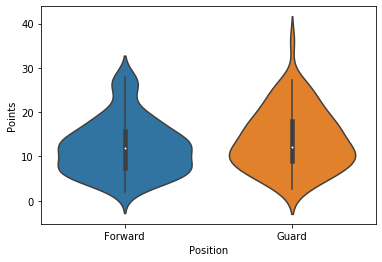

In [10]:
vplot = sns.violinplot(x="Position", y="Points", data=Top_200_Players)
vplot